In [ ]:
using Plots; pyplot()
using StatsBase;

In [43]:
a = -10; b=10;
Δ = 0.0001;
x = collect(a+0.5*Δ:Δ:b-0.5*Δ); # midpoints

In [44]:
function normal_pdf(x, μ, σ)
    r = 0.
    r = 1/(σ*sqrt(2*pi))*exp(-0.5*(x-μ)^2/(σ^2))
    return r
end;

In [45]:
f = normal_pdf.(x, 0., 1.);
#f = pois.(x, 1.)
checksum = sum(f)*Δ

1.0000000000000002


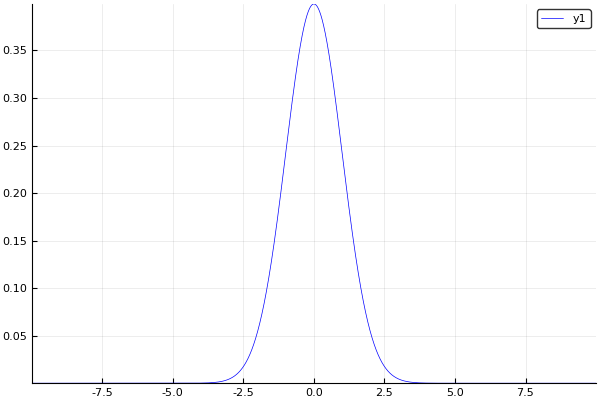

In [46]:
p = plot(x,f, lw=0.5, color=:blue)

In [47]:
ν = f*Δ;
length(ν)

200000

In [48]:
x_i = Float64[];
temp = length(x_i)
while temp < 200
    newrandom = rand(a:(Δ):b)
    if !in(newrandom, x_i)
        push!(x_i, newrandom)
    end
    temp = length(x_i)
end
n_j = fit( Histogram, x_i, a:Δ:b, closed=:left).weights;
in(2,n_j)


false

In [49]:
function pois(ν, n)
   return exp(-ν)*ν^n # factorial is 1..
end;

$\prod\limits_{j=1}^K\textrm{e}^{-\nu_j}\nu_j^{n_j} \hspace{2cm}\big|\,\ln()$

$\Rightarrow \sum\limits_{j=1}^K\ln(\textrm{e}^{-\nu_j}\nu_j^{n_j})$

In [50]:
left_term = 0.
for ibin in 1:length(n_j)
    left_term += log(pois(ν[ibin], n_j[ibin]))
end
left_term

-4828.897930575906

$\prod\limits_{i=1}^n f(x_i|\lambda)\cdot\Delta \hspace{2cm}\big|\,\ln()$

$\Rightarrow \sum\limits_{j=1}^K\ln(f(x_i|\lambda)\cdot\Delta)$

In [51]:
right_term = 0.
for x in x_i
    right_term += log(normal_pdf.(x, 0., 1.)*Δ)
end
right_term

-4827.892191946176

$\dfrac{1}{e}\prod\limits_{i=1}^n f(x_i|\lambda)\cdot\Delta \hspace{2cm}\big|\,\ln()$

$\Rightarrow \ln(\dfrac{1}{e}\cdot\sum\limits_{j=1}^K\ln(f(x_i|\lambda)\cdot\Delta) = -1+\sum\limits_{j=1}^K\ln(f(x_i|\lambda)\cdot\Delta)$

In [52]:
right_term_e = 0.
for x in x_i
    right_term_e += log(normal_pdf.(x, 0., 1.)*Δ)
end
right_term_e-1

-4828.892191946176

$\dfrac{1}{e} \lim\limits_{K\rightarrow\infty}\prod\limits_{j=1}^K\nu_j^{n_j} \hspace{2cm}\big|\,\ln()$

$\Rightarrow -1 + \lim\limits_{K\rightarrow\infty}\sum\limits_{j=1}^K\ln(\nu_j^{n_j})$

$\Rightarrow -1 + \lim\limits_{K\rightarrow\infty}\sum\limits_{j=1}^Kn_j\ln(\nu_j)$

$\Rightarrow -1 + \sum\limits_{i=1}^n\ln(\lim\limits_{K\rightarrow\infty} \nu_j)$

$\Rightarrow -1 + \sum\limits_{i=1}^n\ln(f(x_i|\lambda)\Delta)   \hspace{2cm}\big|\,f_i\Delta \ll 1 \Rightarrow\left|\ln(f_i\Delta)\right| >> 1 $

$\approx\sum\limits_{i=1}^n\ln( f(x_i|\lambda)\Delta)$  

$\ln(\prod\limits_{i=1}^n f(x_i|\lambda)\Delta)  \hspace{2cm}\big|\exp()$

$\prod\limits_{i=1}^n f(x_i|\lambda)\Delta$

In [62]:
n = collect(1:100);
y_e = Float64[]
y   = Float64[]

for i in 1:length(n)
    push!(y_e, -i-1)
    push!(y,   -i)
end

In [63]:
exp_e = exp.(y_e);
exp_w = exp.(y);


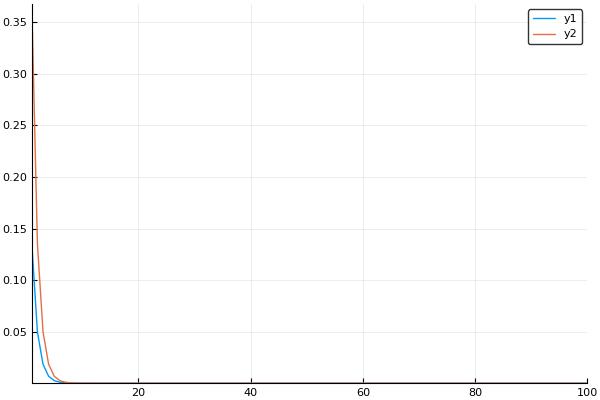

In [66]:
plot(n, exp_e)
plot!(n, exp_w)



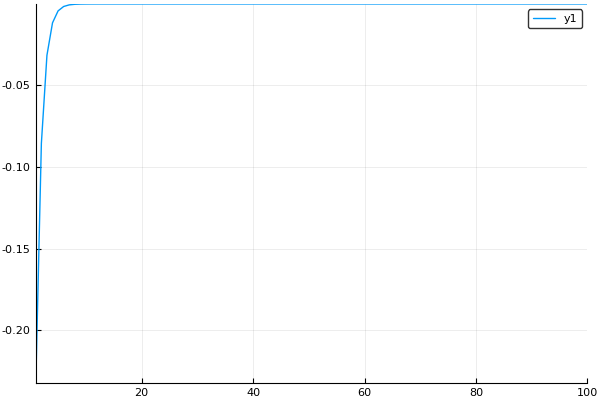

In [65]:
plot(n, (exp_e.-exp_w))

In [35]:
function calc(K)
    value = 1
    for i in 1:K
        value *= exp(-1//K)
    end
    return value
end

calc (generic function with 1 method)

In [60]:
k_arr = calc.(n);


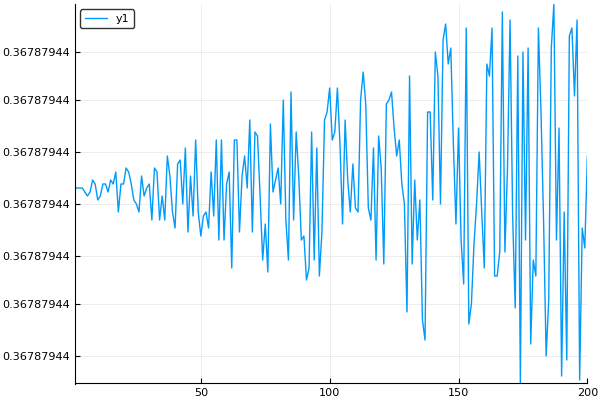

In [61]:
plot(n, k_arr)

In [42]:
1/e

0.36787944117144233